In [1]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Read csv files and build input tensors

In [2]:
DIR = "C:/Users/ADMIN/Desktop/Lab 3M TUG data files"

In [3]:
file_length = 1000

In [4]:
fileNo = 0
fnamelst = []
for fname in os.listdir(DIR):
    if fname.endswith(".csv"):
        fnamelst.append(fname)
        fileNo = fileNo +1
        fname_with_path = DIR + '/' + fname
        df = pd.read_csv(fname_with_path,usecols=[1, 2, 3])
        df = df[0:file_length]  # select the first file_length data 
        tensor = torch.FloatTensor(df[['AccX', 'AccY', 'AccZ']].values.tolist())
        tensor = tensor.view(1, file_length, 3)
        if(fileNo == 1):
            resultx = tensor
        else:
            resultx = torch.cat((resultx, tensor), 0)
        
        test = fname.split('_')
        if(test[0] == 'W'):
            y= torch.FloatTensor([0]).view(1, 1) # label 0 if weighted 
        else:
            y= torch.FloatTensor([1]).view(1, 1) # label 1 if normal
        if(fileNo == 1):
            resulty = y
        else:
            resulty = torch.cat((resulty, y), 0)

In [5]:
print(resultx.shape, resulty.shape)

torch.Size([101, 1000, 3]) torch.Size([101, 1])


# Run TSEN to visually explore clusters

In [6]:
resultx = resultx.view(101, file_length*3)

In [7]:
resulty=resulty.view(101)

Try perplexity = 2,  5,  30,  50,  100,  

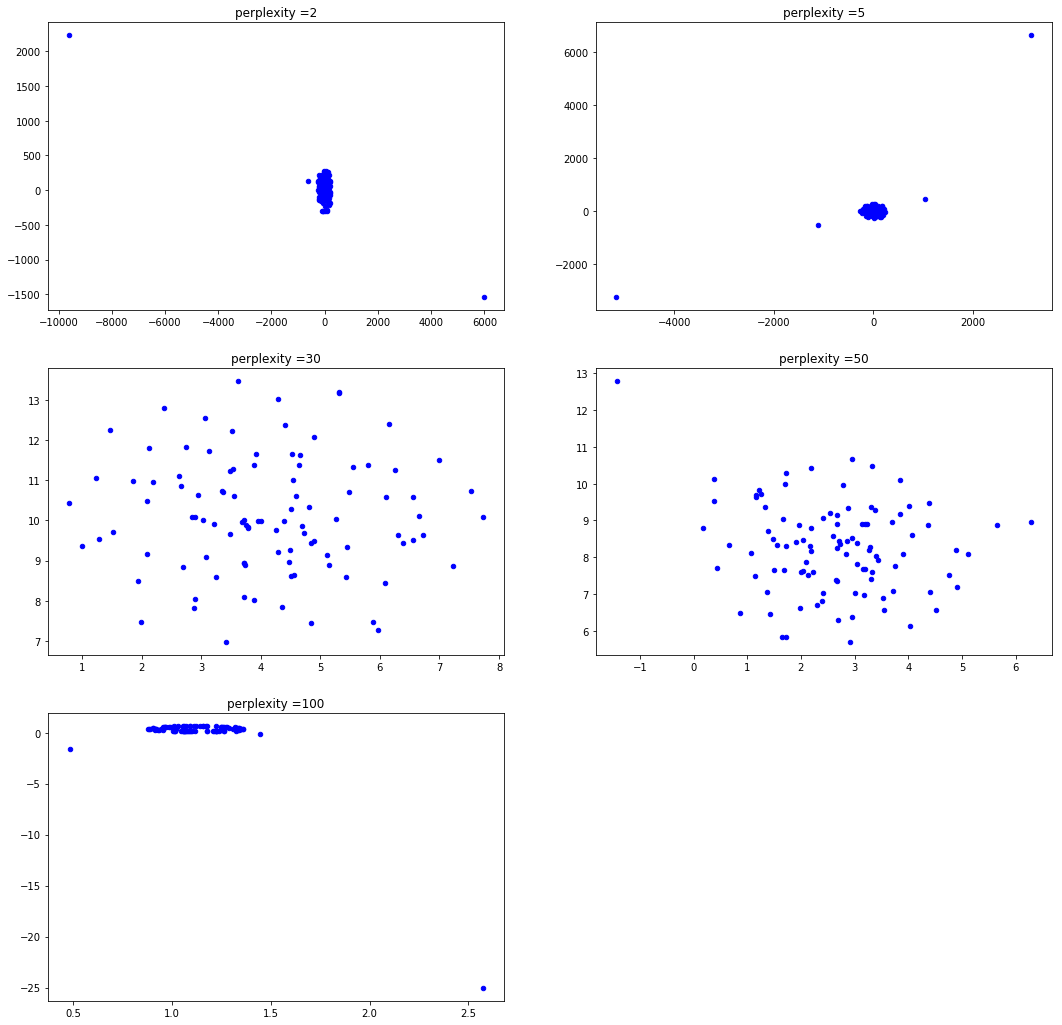

In [8]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(resultx.numpy())
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c='blue')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()

Try perplexity = 2,  5,  30,  50,  100,  

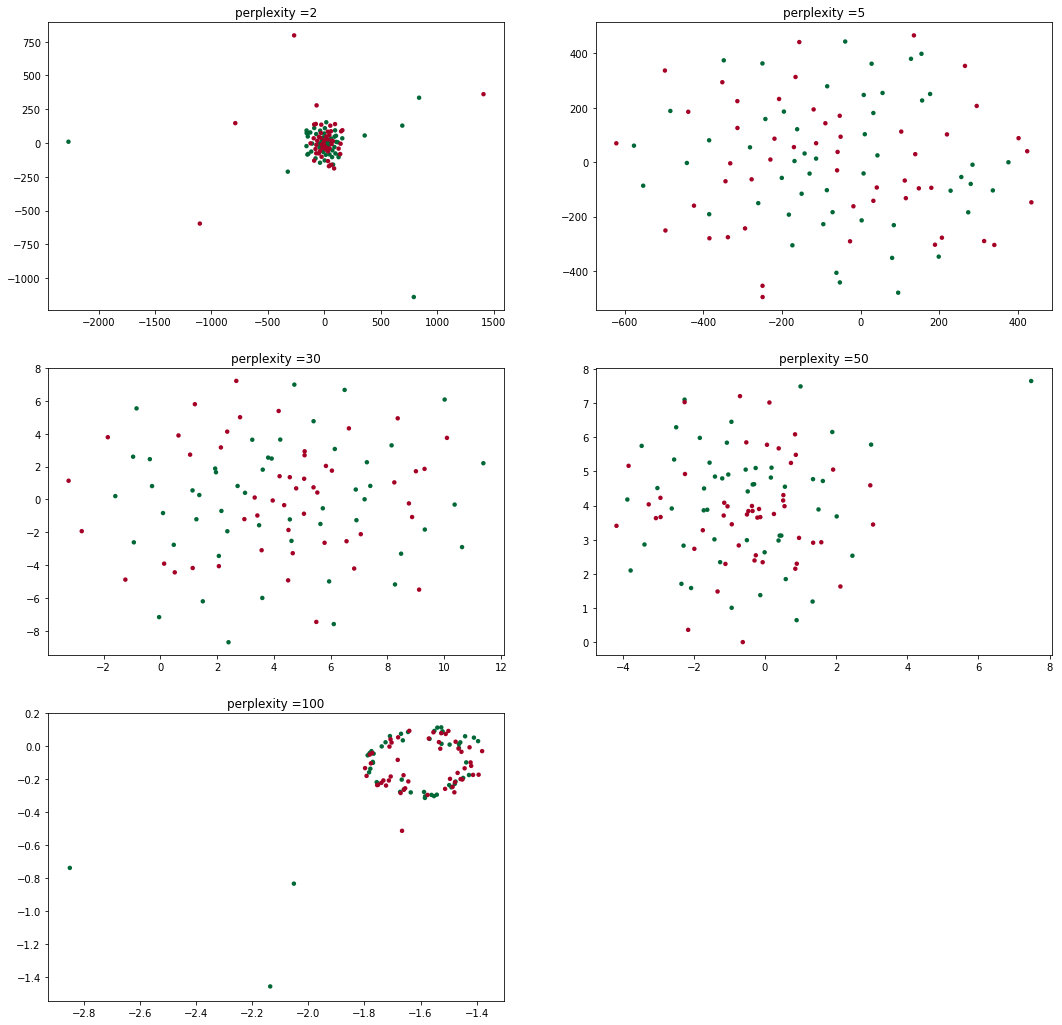

In [9]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(resultx.numpy(), resulty)
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c=resulty.numpy(), lw=0, cmap='RdYlGn')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()